In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy

# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes (all of the world)
lat_range = (-90,90)
lng_range = (-180,180)

Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs  = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

493

Perform API Calls

    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it's being processed (with the city number and city name).

In [124]:
url = url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for x, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (x % 50 == 0 and x >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manakara
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | kodinsk
Processing Record 6 of Set 1 | nizhneangarsk
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | yung shue wan
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | nimaparha
Processing Record 14 of Set 1 | sylva
Processing Record 15 of Set 1 | jwaneng
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | xining
Processing Record 18 of Set 1 | cedeira
Processing Record 19 of Set 1 | primorsko-akhtarsk
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | port allen
Processing Record 23 o

Convert Raw Data to Dataframe

    Export the data into .csv.
    Display the dataframe.

In [125]:
# Load the dataframe
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          470
Lat           470
Lng           470
Max Temp      470
Humidity      470
Cloudiness    470
Wind Speed    470
Country       470
Date          470
dtype: int64

In [126]:
# Display df with header
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manakara,-22.1333,48.0167,78.13,90,27,6.55,MG,1744213096
1,bilibino,68.0546,166.4372,1.92,99,99,5.39,RU,1744213096
2,grytviken,-54.2811,-36.5092,46.24,74,26,5.82,GS,1744213097
3,port elizabeth,-33.9180,25.5701,66.49,99,100,14.97,ZA,1744213046
4,kodinsk,58.6881,99.1844,22.87,76,100,5.17,RU,1744213097


Remove the cities where the humidity is above 100%.

In [127]:
# Description of data
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02
mean,21.771280,19.474597,60.102234,68.814894,60.097872,8.815766,1.744213e+09
std,32.710598,88.832241,23.080837,22.085746,37.950633,5.732101,5.433794e+01
min,-54.800000,-176.559700,-16.280000,5.000000,0.000000,0.000000,1.744213e+09
25%,-4.000025,-60.194450,42.902500,55.000000,20.000000,4.610000,1.744213e+09
50%,26.892750,26.883150,64.870000,73.000000,75.000000,7.900000,1.744213e+09
75%,48.619825,94.412475,79.180000,86.000000,99.000000,12.042500,1.744213e+09
max,78.218600,177.483300,106.210000,100.000000,100.000000,33.170000,1.744213e+09


In [128]:
# Get the indices of cities that have humidity over 100%
dirty_city = city_data_pd[(city_data_pd["Humidity"]>100)].index
dirty_city

Index([], dtype='int64')

In [129]:
# Make a new DataFrame and have all of the humidity outliers dropped.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = city_data_pd.drop(dirty_city, inplace = False)
clean_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manakara,-22.1333,48.0167,78.13,90,27,6.55,MG,1744213096
1,bilibino,68.0546,166.4372,1.92,99,99,5.39,RU,1744213096
2,grytviken,-54.2811,-36.5092,46.24,74,26,5.82,GS,1744213097
3,port elizabeth,-33.9180,25.5701,66.49,99,100,14.97,ZA,1744213046
4,kodinsk,58.6881,99.1844,22.87,76,100,5.17,RU,1744213097


In [130]:
# Preparing the columns for plotting
lats = clean_data["Lat"]
max_temps = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]

# Export the City_Data into a csv
clean_data.to_csv(output_data_file, index_label="City_ID")

Plotting the Data

    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

Latitude v Temperature Plot

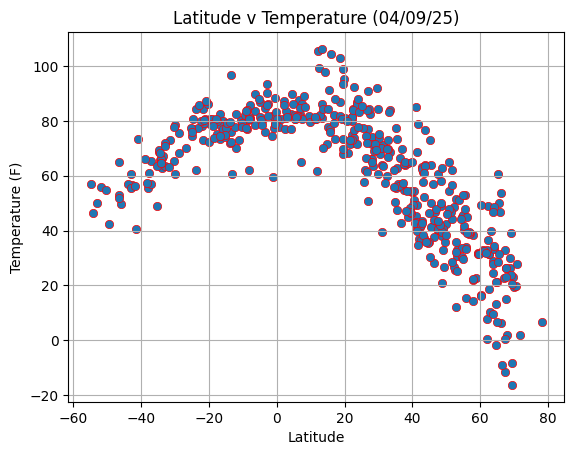

In [131]:
# Create design for the plot
plt.scatter(lats, max_temps, edgecolor="red", linewidth=0.5, marker="o", alpha=1.0, label="Cities")

# Declare the x and y axes
plt.title(f"Latitude v Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the plot and display
plt.savefig("output_data/LatvTemp.png")
plt.show()                                                                                                                  

Latitude v Humidity Plot

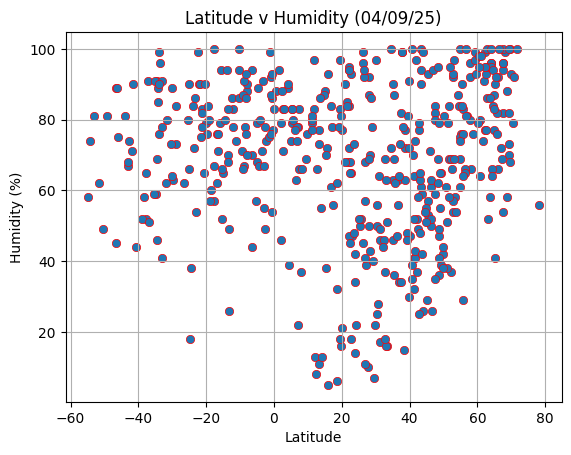

In [132]:
# Create design for the plot
plt.scatter(lats, humidity, edgecolor="red", linewidth=0.5, marker="o", alpha=1.0, label="Cities")

# Declare the x and y axes
plt.title(f"Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the plot and display
plt.savefig("output_data/LatvHumidity.png")
plt.show()                                                                                                                  

Latitude v Cloudiness Plot

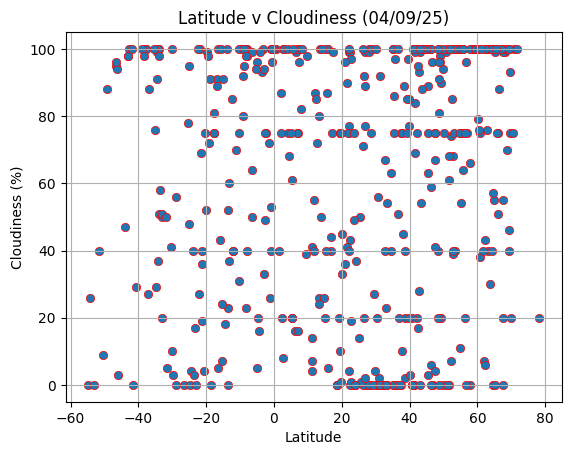

In [133]:
# Create design for the plot
plt.scatter(lats, cloudiness, edgecolor="red", linewidth=0.5, marker="o", alpha=1.0, label="Cities")

# Declare the x and y axes
plt.title(f"Latitude v Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plot and display
plt.savefig("output_data/LatvCloudiness.png")
plt.show()     

Latitude v Wind Speed Plot

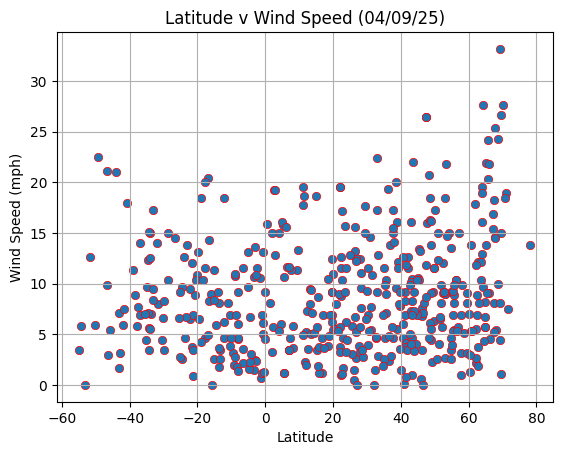

In [134]:
# Create design for the plot
plt.scatter(lats, wind_speed, edgecolor="red", linewidth=0.5, marker="o", alpha=1.0, label="Cities")

# Declare the x and y axes
plt.title(f"Latitude v Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the plot and display
plt.savefig("output_data/LatvWindSpeed.png")
plt.show()     

Linear Regression

In [135]:
# Create Northern Hemisphere DataFrame
northern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] >= 0]

# Display
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bilibino,68.0546,166.4372,1.92,99,99,5.39,RU,1744213096
4,kodinsk,58.6881,99.1844,22.87,76,100,5.17,RU,1744213097
5,nizhneangarsk,55.7833,109.5500,15.40,83,100,5.39,RU,1744213097
7,porto novo,6.4965,2.6036,87.62,63,99,11.65,BJ,1744213097
9,yung shue wan,22.2333,114.1167,74.75,84,77,1.01,HK,1744213097


In [136]:
# Create Southern hemisphere DataFrame
southern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] < 0]

# Display
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manakara,-22.1333,48.0167,78.13,90,27,6.55,MG,1744213096
2,grytviken,-54.2811,-36.5092,46.24,74,26,5.82,GS,1744213097
3,port elizabeth,-33.9180,25.5701,66.49,99,100,14.97,ZA,1744213046
6,hithadhoo,-0.6000,73.0833,78.89,86,100,13.11,MV,1744213097
8,port alfred,-33.5906,26.8910,67.17,96,58,7.00,ZA,1744213097


In [137]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

Northern Hemisphere - Latitude v Temperature Linear Regression

The r-squared is : -0.87


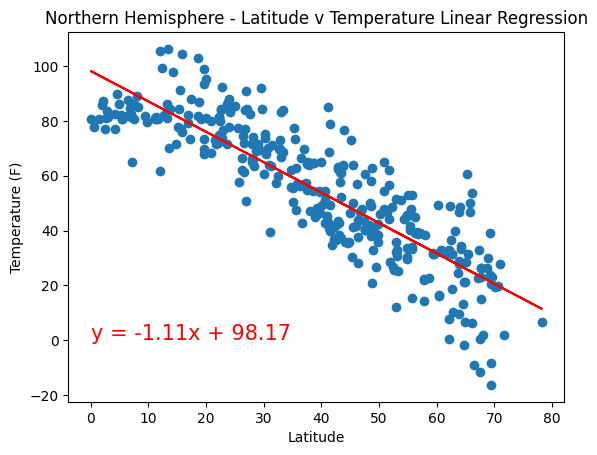

In [138]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Latitude v Temperature Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Latitude v Temperature Linear Regression.png")

Southern Hemisphere - Latitude v Temperature Linear Regression

The r-squared is : 0.79


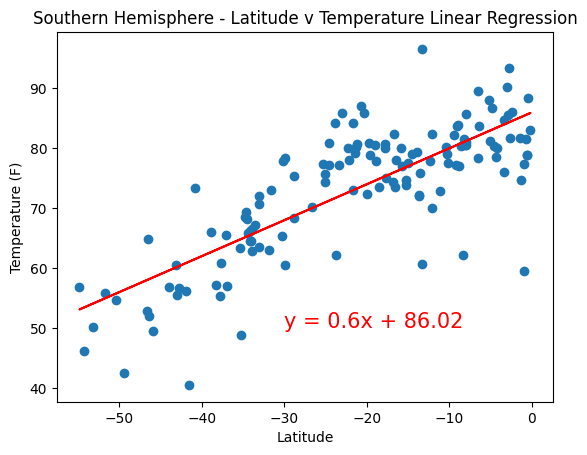

In [139]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Latitude v Temperature Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Latitude v Temperature Linear Regression.png")

Northern Hemisphere - Latitude v Humidity Linear Regression

The r-squared is : 0.23


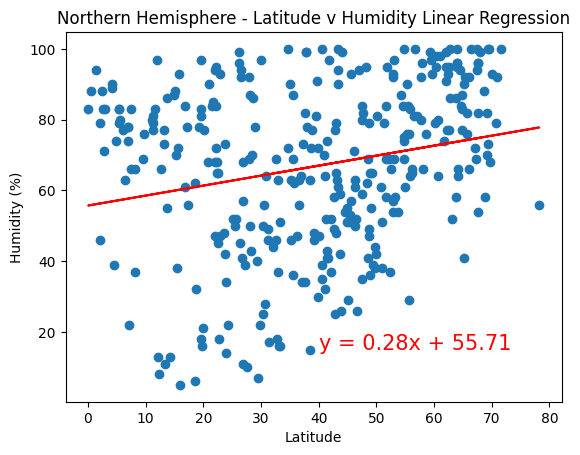

In [140]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Latitude v Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Latitude v Humidity Linear Regression.png")

Southern Hemisphere Latitude v Humidity Linear Regression

The r-squared is : 0.15


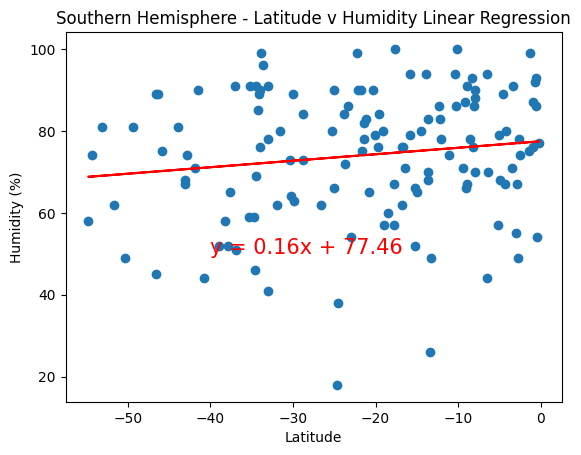

In [141]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, -40, 50)

# Set a title
plt.title("Southern Hemisphere - Latitude v Humidity Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Latitude v Humidity Linear Regression.png")

Northern Hemisphere - Latitude v Cloudiness Linear Regression

The r-squared is : 0.18


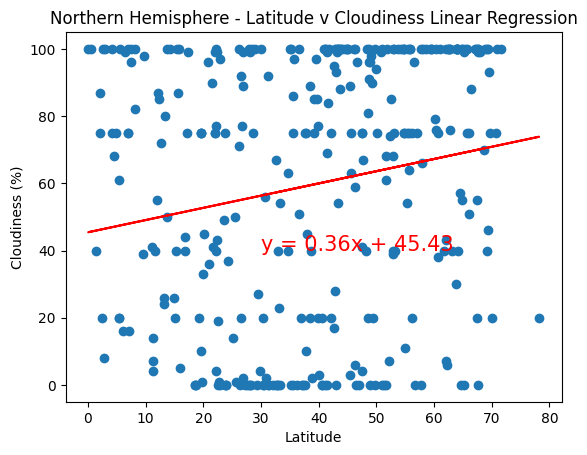

In [142]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Latitude v Cloudiness Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Latitude v Cloudiness Linear Regression.png")

Southern Hemisphere - Latitude v Cloudiness Linear Regression

The r-squared is : 0.14


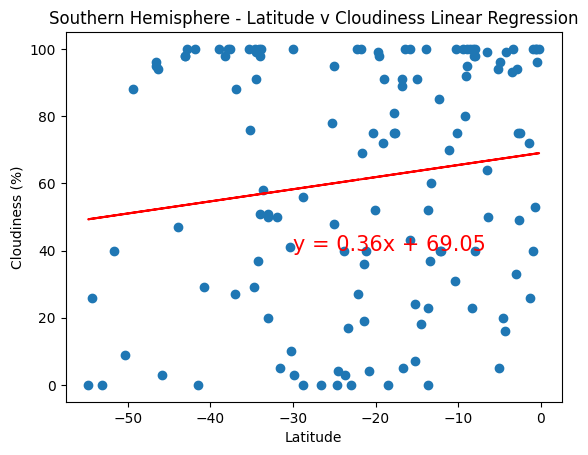

In [143]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Latitude v Cloudiness Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Latitude v Cloudiness Linear Regression.png")

Northern Hemisphere - Latitude v Wind Speed Linear Regression

The r-squared is : 0.18


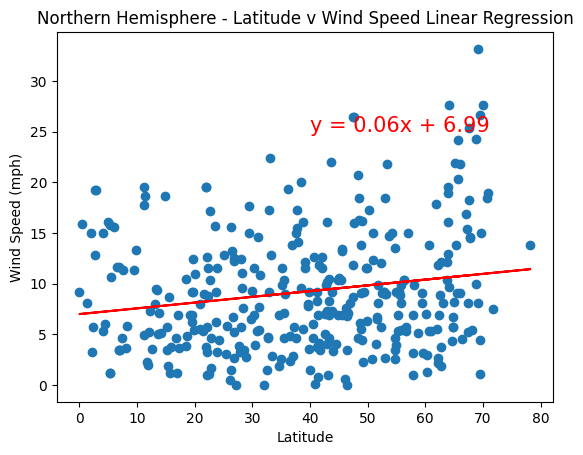

In [144]:
# Call a function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, 40, 25)

# Set a title
plt.title("Northern Hemisphere - Latitude v Wind Speed Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Latitude v Wind Speed Linear Regression.png")

Southern Hemisphere - Latitude v Wind Speed Linear Regression

The r-squared is : -0.22


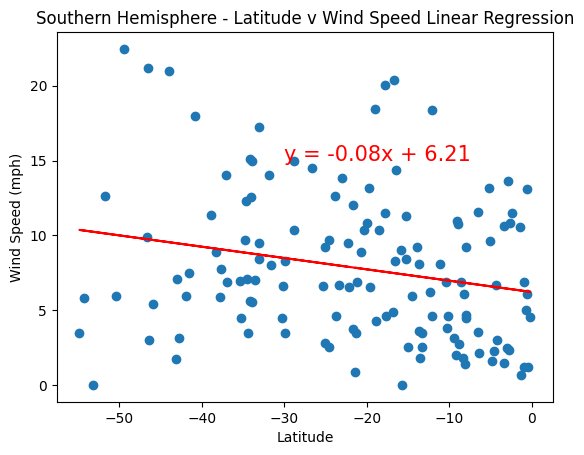

In [145]:
# Call a function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, -30, 15)

# Set a title
plt.title("Southern Hemisphere - Latitude v Wind Speed Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Latitude v Wind Speed Linear Regression.png")